In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

R> library("MSA")
R> data("mcdonalds", package ="MSA")
R> names(mcdonalds)

In [2]:
df= pd.read_csv("mcdonalds.csv")
df.columns.to_list()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

R> dim(mcdonalds)

In [3]:
df.shape

(1453, 15)

R> head(mcdonalds, 3)

In [4]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


R> MD.x <- as.matrix(mcdonalds[, 1:11])
R> MD.x <- (MD.x == "Yes") + 0
R> round(colMeans(MD.x), 2)

In [5]:
df_segment_variables = df.iloc[:,0:11]
print(df_segment_variables.shape)
df_segment_variables.replace("Yes",1,inplace=True)
df_segment_variables.replace("No",0,inplace=True)
print(df_segment_variables.head(3))
round(df_segment_variables.mean(),2)

(1453, 11)
   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   

   healthy  disgusting  
0        0           0  
1        0           0  
2        1           0  


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

R> MD.pca <- prcomp(MD.x)
R> summary(MD.pca)

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df_segment_variables)
# print(pca.explained_variance_**0.5)
# print(pca.explained_variance_ratio_)
# print(pca.explained_variance_ratio_.cumsum())
row_names=["PC"+str(i+1) for i in range(len(pca.explained_variance_ratio_))]
pca_df=pd.DataFrame({"Standard_dev":pca.explained_variance_**0.5,"Prop of Variance":pca.explained_variance_ratio_,"Cumulative_prop":pca.explained_variance_ratio_.cumsum()},index=row_names)
pca_df=pca_df.T
pca_df.head()

c:\Users\Sairam\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard_dev,0.757050,0.607456,0.504619,0.398799,0.337405,0.310275,0.289697,0.275122,0.265251,0.248842,0.236903
Prop of Variance,0.299447,0.192797,0.133045,0.083096,0.059481,0.050300,0.043849,0.039548,0.036761,0.032353,0.029323
Cumulative_prop,0.299447,0.492244,0.625290,0.708386,0.767866,0.818166,0.862015,0.901563,0.938323,0.970677,1.000000


R> print(MD.pca, digits = 1)

In [7]:
pca_comp_df=pd.DataFrame(pca.components_.T*-1,index=pca.feature_names_in_.tolist(),columns=row_names)
pca_comp_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.476933,-0.363790,0.304444,-0.055162,0.307535,-0.170738,0.280519,-0.013041,-0.572403,0.110284,-0.045439
convenient,0.155332,-0.016414,0.062515,0.142425,-0.277608,0.347830,0.059738,0.113079,0.018465,0.665818,0.541616
spicy,0.006356,-0.018809,0.037019,-0.197619,-0.070620,0.355087,-0.707637,-0.375934,-0.400280,0.075634,-0.141730
fattening,-0.116232,0.034094,0.322359,0.354139,0.073405,0.406515,0.385943,-0.589622,0.160512,0.005338,-0.250910
greasy,-0.304443,0.063839,0.802373,-0.253960,-0.361399,-0.209347,-0.036170,0.138241,0.002847,-0.008707,-0.001642
fast,0.108493,0.086972,0.064642,0.097363,-0.107930,0.594632,0.086846,0.627799,-0.166197,-0.239532,-0.339265
cheap,0.337186,0.610633,0.149310,-0.118958,0.128973,0.103241,0.040449,-0.140060,-0.076069,-0.428087,0.489283
tasty,0.471514,-0.307318,0.287265,0.002547,0.210899,0.076914,-0.360453,0.072792,0.639086,-0.079184,-0.019552
expensive,-0.329042,-0.601286,-0.024397,-0.067816,0.003125,0.261342,0.068385,-0.029539,-0.066996,-0.454399,0.490069
healthy,0.213711,-0.076593,-0.192051,-0.763488,-0.287846,0.178226,0.349616,-0.176303,0.185572,0.038117,-0.157608


R> library("flexclust")
R> plot(predict(MD.pca), col = "grey")
R> projAxes(MD.pca)

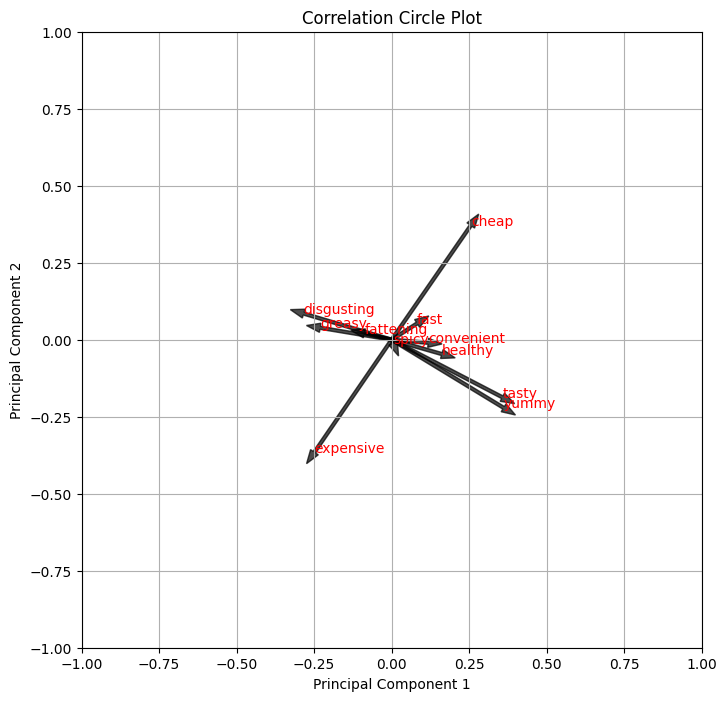

In [8]:
loadings = pca.components_.T*-1 * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(8, 8))
plt.title('Correlation Circle Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add variable labels to the plot
for i, feature in enumerate(df_segment_variables.columns):
    plt.annotate(feature, 
                 (loadings[i, 0],
                  loadings[i, 1]),
                 color='red')
    plt.arrow(0, 0,
              loadings[i, 0],
              loadings[i, 1],
              color='black',
              alpha=0.7, 
              width=0.01,
             )

plt.xlim(-1,1)
plt.ylim(-1,1)

plt.grid(True)

plt.show()

R> set.seed(1234)
R> MD.km28 <- stepFlexclust(MD.x, 2:8, nrep = 10, verbose = FALSE)
R> MD.km28 <- relabel(MD.km28)

In [ ]:
from sklearn.cluster import KMeans
inertia=[ ]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=1234)
    kmeans.fit(df_segment_variables)
    inertia.append(kmeans.inertia_)

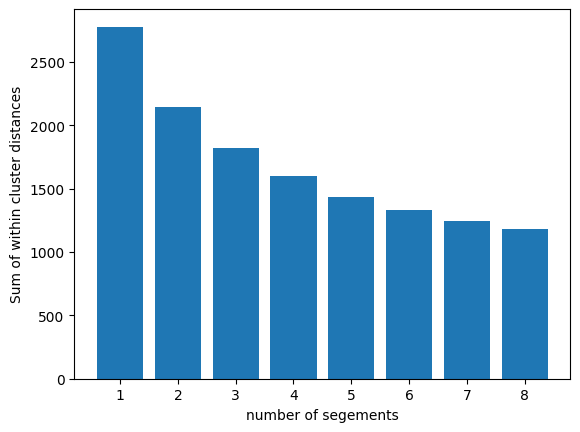

In [10]:
plt.bar([1,2,3,4,5,6,7,8],inertia)
plt.ylabel("Sum of within cluster distances")
plt.xlabel("number of segements")
plt.show()

R> set.seed(1234)
R> MD.b28 <- bootFlexclust(MD.x, 2:8, nrep = 10, nboot = 100)
R> plot(MD.b28, xlab = "number of segments",ylab = "adjusted Rand index")

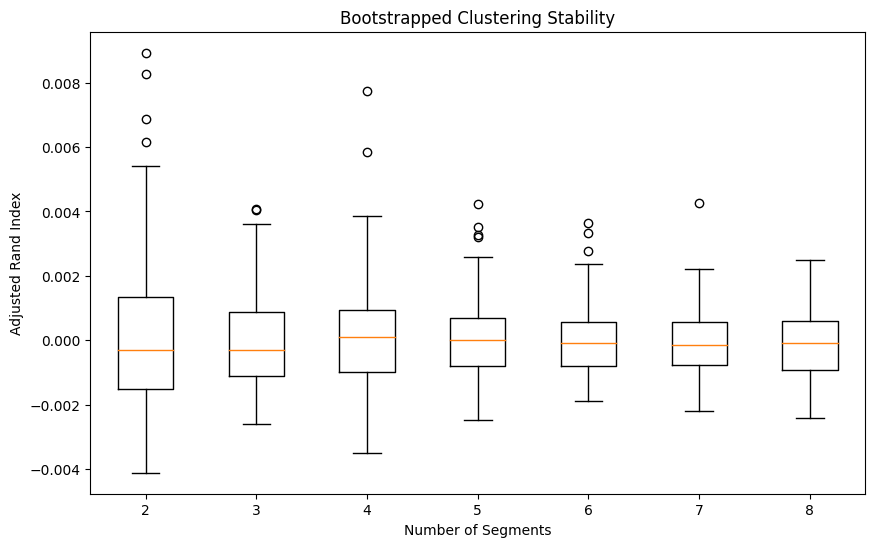

In [11]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
cluster_range = range(2, 9)
nrep = 10
nboot = 100

inertias = np.zeros((len(cluster_range), nboot))
ari_scores = {k: [] for k in cluster_range}
for i, k in enumerate(cluster_range):
    for j in range(nboot):
        MD_x_boot = resample(df_segment_variables)
        kmeans_orig = KMeans(n_clusters=k, n_init=nrep, random_state=1234).fit(df_segment_variables)
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234).fit(MD_x_boot)
        inertias[i, j] = kmeans.inertia_
        ari = adjusted_rand_score(kmeans_orig.labels_, kmeans.labels_)
        # Store the ARI score
        ari_scores[k].append(ari)

# Prepare data for boxplot
data = [ari_scores[k] for k in cluster_range]

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=cluster_range)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Bootstrapped Clustering Stability')
plt.show()

R> histogram(MD.km28[["4"]], data = MD.x, xlim = 0:1)

In [ ]:
cluster_4=KMeans(n_clusters=4,random_state=1234).fit(df_segment_variables)

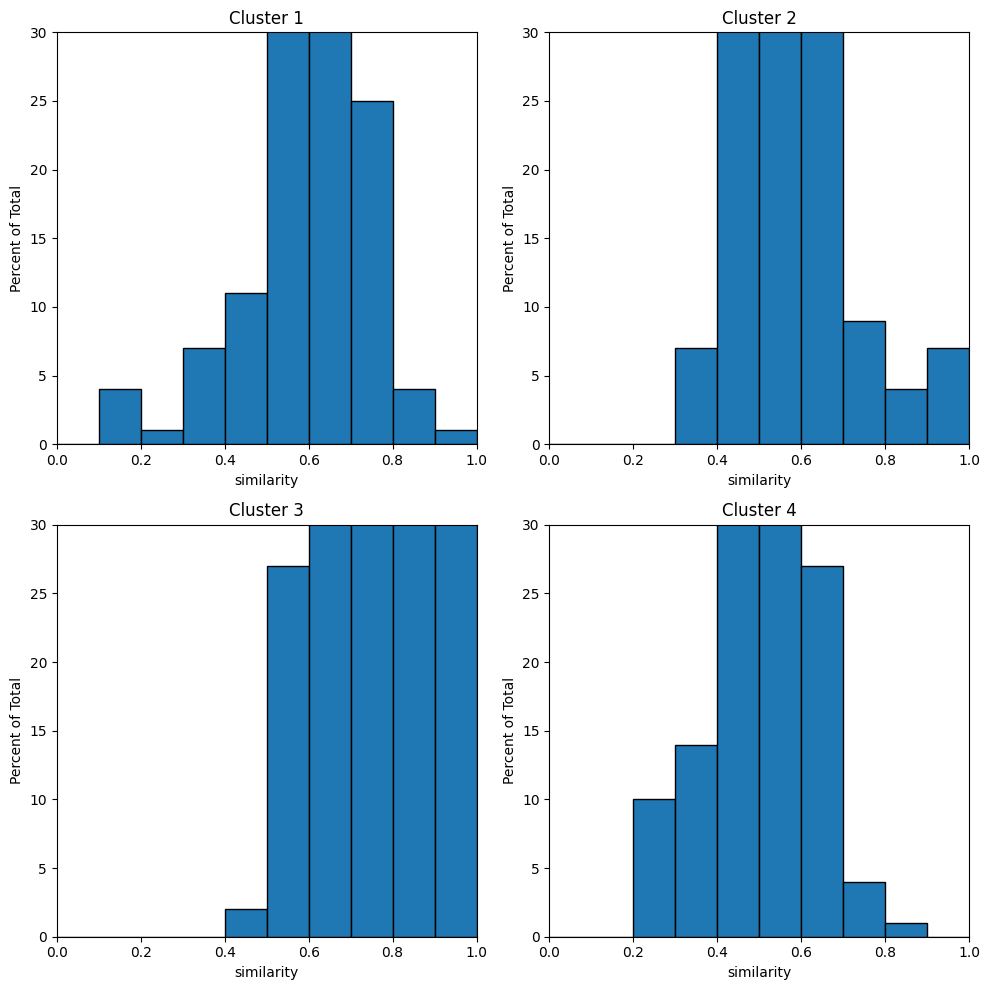

In [23]:
np.random.seed(1234)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234).fit(df_segment_variables)
clusters = kmeans.labels_
def plot_histogram_clusters(data, clusters, n_clusters, xlim):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.flatten()
    
    for i in range(n_clusters):
        cluster_data = data[clusters == i]
        similarity = cluster_data.mean(axis=1)
        ax = axes[i]
        ax.hist(similarity, bins=10, range=xlim, edgecolor='black')
        ax.set_xlim(xlim)
        ax.set_ylim(0, 30)
        ax.set_title(f'Cluster {i+1}')
        ax.set_xlabel('similarity')
        ax.set_ylabel('Percent of Total')
    
    plt.tight_layout()
    plt.show()

plot_histogram_clusters(df_segment_variables, clusters, 4, (0, 1))

R> library("flexmix")
R> set.seed(1234)
R> MD.m28 <- stepFlexmix(MD.x ~ 1, k = 2:8, nrep = 10,
+ model = FLXMCmvbinary(), verbose = FALSE)
R> MD.m28

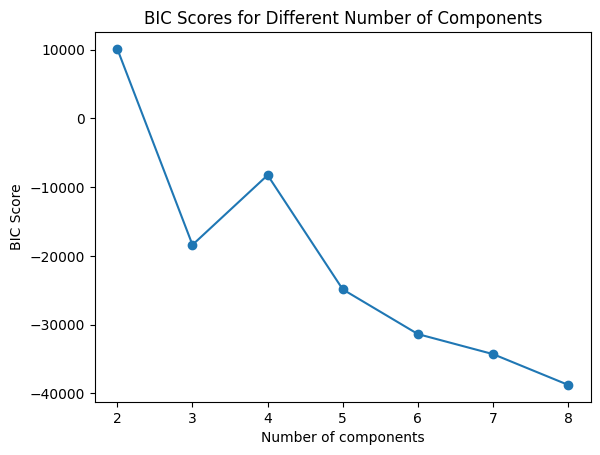

In [36]:
from sklearn.mixture import GaussianMixture
def fit_gmm_with_k(data, k_range, n_init=10):
    best_gmms = {}
    for k in k_range:
        gmm = GaussianMixture(n_components=k, n_init=n_init, random_state=1234)
        gmm.fit(data)
        best_gmms[k] = gmm
    return best_gmms

k_range = range(2, 9)
best_gmms = fit_gmm_with_k(df_segment_variables, k_range, n_init=10)
bic_scores = [gmm.bic(df_segment_variables) for gmm in best_gmms.values()]

plt.plot(k_range, bic_scores, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC Score')
plt.title('BIC Scores for Different Number of Components')
plt.show()

MD.m4a <- flexmix(MD.x ~1, cluster = clusters(MD.k4),+ model = FLXMCmvbinary())
R> table(kmeans = clusters(MD.k4),+ mixture = clusters(MD.m4a))

Confusion Matrix between KMeans and GMM Clusters:
[[242   0   0   0]
 [  0 513   0   0]
 [  0   0 332   0]
 [  0   0   0 366]]


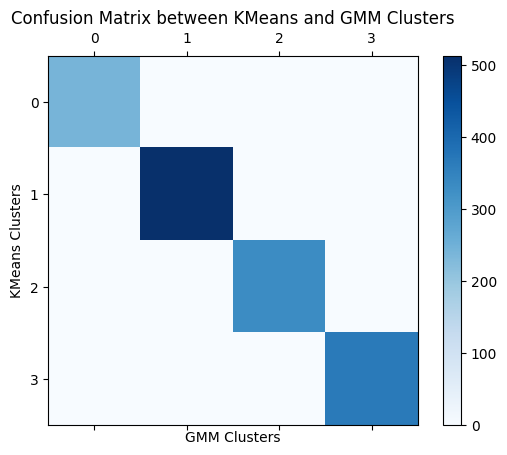

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


# scaler = StandardScaler()
# MD_x_scaled = scaler.fit_transform(df_segment_variables)

MD_x_scaled=df_segment_variables
# Fit KMeans for 4 clusters
np.random.seed(1234)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234).fit(MD_x_scaled)
kmeans_labels = kmeans.labels_

# Fit GMM with 4 components
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x_scaled)
gmm_labels = gmm.predict(MD_x_scaled)

# Create a confusion matrix to compare the clusters
conf_matrix = confusion_matrix(kmeans_labels, gmm_labels)

# Display the confusion matrix
print("Confusion Matrix between KMeans and GMM Clusters:")
print(conf_matrix)

# Optional: plot confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix between KMeans and GMM Clusters')
fig.colorbar(cax)
plt.xlabel('GMM Clusters')
plt.ylabel('KMeans Clusters')
plt.show()


rev(table(mcdonalds$Like))

In [48]:
ratings=df.Like.unique().tolist()

In [63]:
def convert(x):
    if x[0]=="I":
        x=int(x[-2:])
    else:
        x=int(x)
    return x

In [67]:
df['Like']=df['Like'].apply(convert)

In [68]:
df['Like'].value_counts()

 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64